In [ ]:
# --- 1. Import Library ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# --- 2. Load Dataset ---
try:
    df = pd.read_csv('/content/drive/MyDrive/dataset/heart_cleveland_upload.csv')
    print("\nDataset berhasil dimuat.")
    print("Bentuk dataset:", df.shape)
    print("Kolom dataset:", df.columns.tolist())
except FileNotFoundError:
    print("Error: File 'heart_cleveland_upload.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    exit()



Dataset berhasil dimuat.
Bentuk dataset: (297, 14)
Kolom dataset: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [ ]:
# --- 3. Exploratory Data Analysis (EDA) ---
print("\n--- EDA Awal ---")
print("Informasi Dataset:")
df.info()


--- EDA Awal ---
Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std 

In [ ]:
# Periksa missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64



Distribusi Variabel Target 'condition':
condition
0    160
1    137
Name: count, dtype: int64


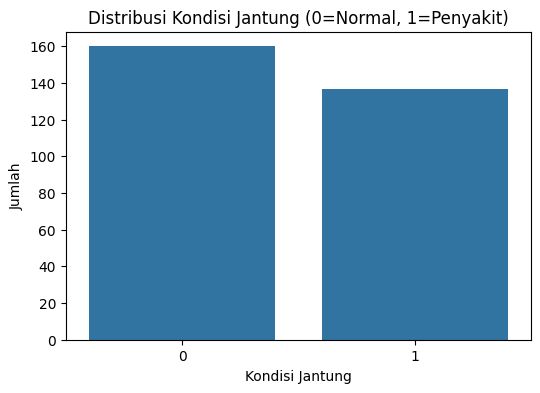

In [ ]:
# Distribusi variabel target 'condition'
print("\nDistribusi Variabel Target 'condition':")
print(df['condition'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='condition', data=df)
plt.title('Distribusi Kondisi Jantung (0=Normal, 1=Penyakit)')
plt.xlabel('Kondisi Jantung')
plt.ylabel('Jumlah')
plt.show()

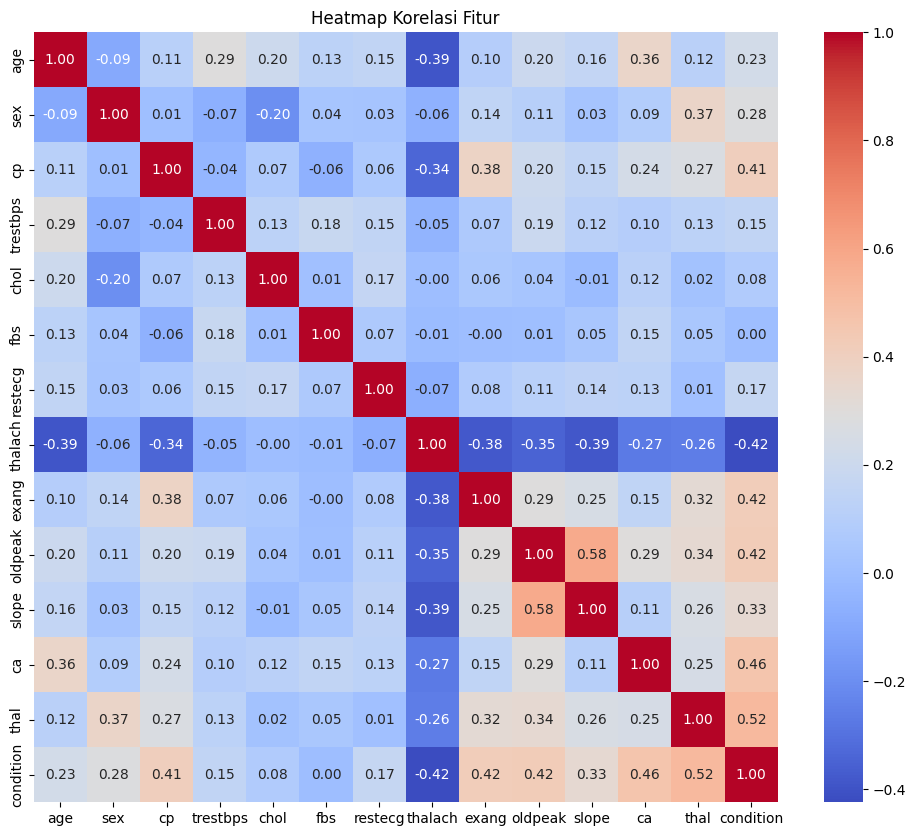

In [ ]:
# Korelasi antar fitur (opsional, bisa lebih lanjut)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()

Text(0.5, 1.0, 'Distribusi Usia')

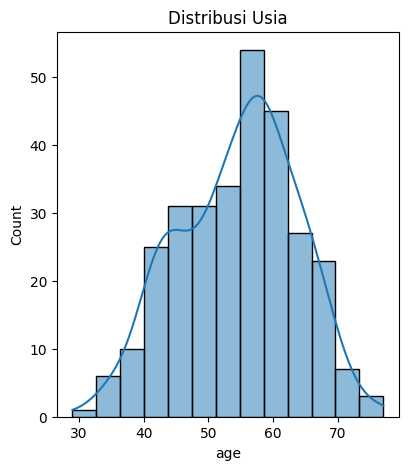

In [ ]:
# Contoh visualisasi distribusi beberapa fitur penting
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribusi Usia')

Text(0.5, 1.0, 'Distribusi Jenis Kelamin (0=Wanita, 1=Pria)')

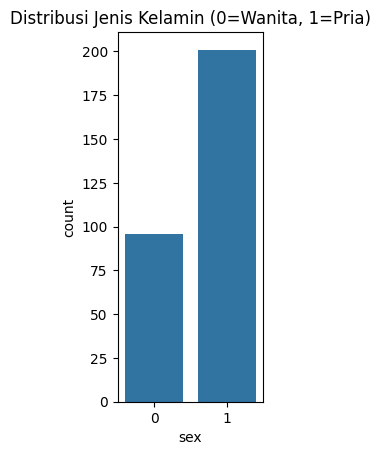

In [ ]:
plt.subplot(1, 3, 2)
sns.countplot(x='sex', data=df)
plt.title('Distribusi Jenis Kelamin (0=Wanita, 1=Pria)')

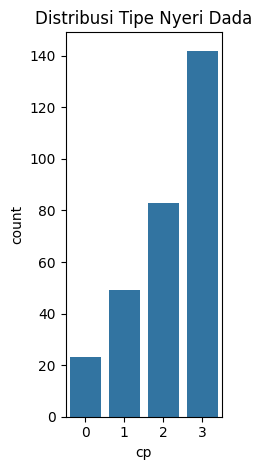

In [ ]:
plt.subplot(1, 3, 3)
sns.countplot(x='cp', data=df)
plt.title('Distribusi Tipe Nyeri Dada')
plt.tight_layout()
plt.show()

In [ ]:
# --- 4. Preprocessing Data ---
# Memisahkan fitur (X) dan target (y)
X = df.drop('condition', axis=1)
y = df['condition']
print("\nFitur (X) dan Target (y) berhasil dipisahkan.")
print("Bentuk X:", X.shape)
print("Bentuk y:", y.shape)


Fitur (X) dan Target (y) berhasil dipisahkan.
Bentuk X: (297, 13)
Bentuk y: (297,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData berhasil dibagi menjadi training dan testing.")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Data berhasil dibagi menjadi training dan testing.
Jumlah data training: 237
Jumlah data testing: 60


In [ ]:
# --- 5. Membangun dan Melatih Model (Random Forest) ---
print("\nMemulai pelatihan model Random Forest...")
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model_rf.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")


Memulai pelatihan model Random Forest...
Model Random Forest berhasil dilatih.


In [ ]:
# --- 6. Evaluasi Model ---
print("\n--- Evaluasi Model ---")
y_pred = model_rf.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





--- Evaluasi Model ---
Akurasi Model: 0.8833

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.96      0.79      0.86        28

    accuracy                           0.88        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60




Confusion Matrix:
[[31  1]
 [ 6 22]]


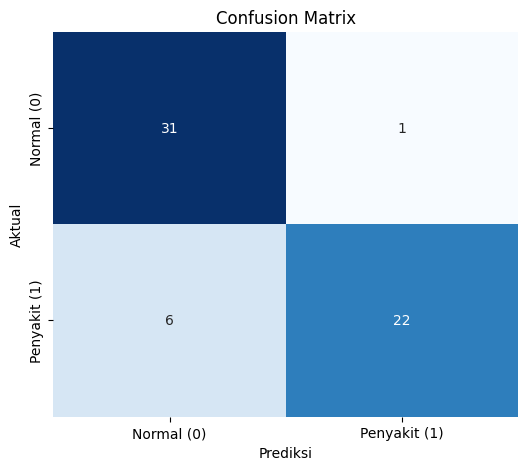

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal (0)', 'Penyakit (1)'],
            yticklabels=['Normal (0)', 'Penyakit (1)'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# --- 7. Menyimpan Model ---
model_filename = 'random_forest_model.joblib'
joblib.dump(model_rf, model_filename)
print(f"\nModel berhasil disimpan sebagai '{model_filename}'")


Model berhasil disimpan sebagai 'random_forest_model.joblib'



Fitur Penting (Feature Importances):
thalach     0.156169
cp          0.128075
oldpeak     0.119032
ca          0.110987
age         0.097335
thal        0.090596
chol        0.081777
trestbps    0.071795
exang       0.046689
slope       0.041003
sex         0.025778
restecg     0.021292
fbs         0.009472
dtype: float64


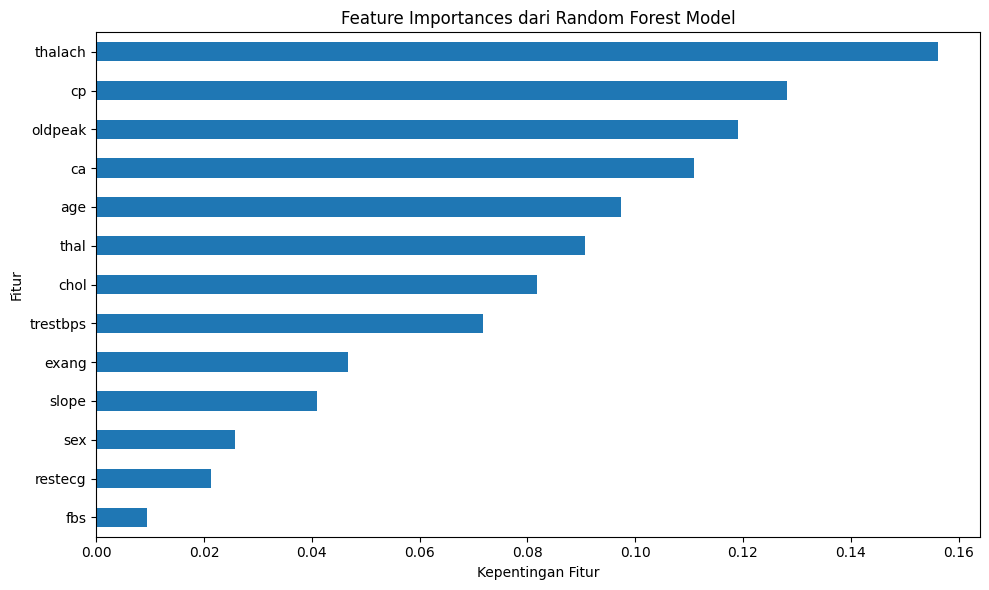

In [ ]:
# --- 8. Informasi Fitur Penting (Optional) ---
print("\nFitur Penting (Feature Importances):")
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances dari Random Forest Model')
plt.xlabel('Kepentingan Fitur')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()